# Categorical variables. Visualization techniques

## Background	
There is an ice cream shop, that is operating in New York, LA and San Francisco.	
### Data	
You have sold 12,327 ice creams in New York; 17,129 in LA and 19,923 in San Francisco.	
### Task	
Order the data in a frequency distribution table.	
Create a new column in your table, representing the relative frequency of input. You can choose to express it in percentages or as a decimal.		

In [1]:
# import pandas module
import pandas as pd

# create a frequency distribution table as a pandas dataframe
fdt = pd.DataFrame({'Frequency' : [12327, 17129, 19923]}, index = ['New York', 'LA', 'San Francisco'])

# add relative frequency to the table
fdt['Relative frequency'] = fdt['Frequency']/fdt['Frequency'].sum()
fdt

,Frequency,Relative frequency
New York,12327,0.249641
LA,17129,0.346888
San Francisco,19923,0.403471


## Background	
You have a frequency distribution table with all the sales.	
### Task	
Create a bar chart, representing the data. 

In [2]:
fdt.plot.bar(y='Frequency')

### Task	
Create a pie chart, representing the share of each city to the sales of your company.		

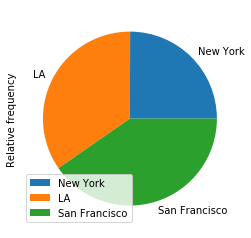

In [3]:
fdt.plot.pie(y='Relative frequency')

## Background	
You have a frequency distribution table with all the sales. You also have the relative frequency from the pie chart problem.
### Task 1	
Order the table by frequency.

In [4]:
fdt = fdt.sort_values(by='Frequency', ascending=False)

### Task 2
Create a bar (column) chart representing the ordered data.

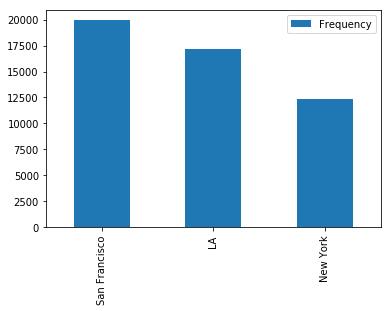

In [5]:
fdt.plot.bar(y='Frequency')

### Task 3	
In a new column, calculate the cumulative frequency of the data. 	

In [6]:
fdt['Cumulative frequency'] = fdt.Frequency.cumsum()/fdt.Frequency.sum()
fdt

,Frequency,Relative frequency,Cumulative frequency
San Francisco,19923,0.403471,0.403471
LA,17129,0.346888,0.750359
New York,12327,0.249641,1.000000


### Task 4	
On a second axis in the same chart, represent the cumulative frequency of the data.

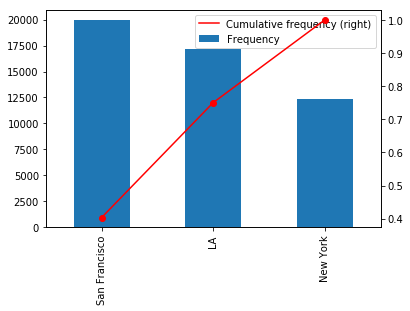

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fdt.plot(ax=ax, y='Cumulative frequency', style='ro-', secondary_y=True)
fdt.plot.bar(ax=ax, y='Frequency')

# Numerical variables. Frequency distribution table

## Background
You are given a dataset

In [8]:
Dataset = pd.Series([8, 30, 30, 50, 86, 94, 102, 110, 169, 170, 176, 236, 240, 241, 242, 255, 262, 276, 279, 282])
Dataset

0       8
1      30
2      30
3      50
4      86
5      94
6     102
7     110
8     169
9     170
10    176
11    236
12    240
13    241
14    242
15    255
16    262
17    276
18    279
19    282
dtype: int64

### Task 1
Given that we want to divide the numbers into 6 intervals of equal width, calculate that interval width. Round up to the nearest whole number, bigger than the result that you obtain								


In [9]:
min_value = Dataset.min()
max_value = Dataset.max()
width = int((max_value-min_value)/6+1)
width

46

### Task 2
Create a frequency distribution table that shows
1. The intervals 

2. The absolute frequency of each interval

3. The relative frequency of each interval


In [10]:
intervals = pd.interval_range(start = min_value, periods = 6, freq = width, closed = 'left')
abs_freq = pd.cut(Dataset, intervals).value_counts(sort = False, normalize = False)
print(abs_freq)
rel_freq = pd.cut(Dataset, intervals).value_counts(sort = False, normalize = True)
print(rel_freq)
table = [[i,a,r] for i,a,r in zip(intervals,abs_freq.get_values(), rel_freq.get_values())]
table

[8, 54)       4
[54, 100)     2
[100, 146)    2
[146, 192)    3
[192, 238)    1
[238, 284)    8
dtype: int64
[8, 54)       0.20
[54, 100)     0.10
[100, 146)    0.10
[146, 192)    0.15
[192, 238)    0.05
[238, 284)    0.40
dtype: float64


[[Interval(8, 54, closed='left'), 4, 0.2],
 [Interval(54, 100, closed='left'), 2, 0.1],
 [Interval(100, 146, closed='left'), 2, 0.1],
 [Interval(146, 192, closed='left'), 3, 0.15],
 [Interval(192, 238, closed='left'), 1, 0.05],
 [Interval(238, 284, closed='left'), 8, 0.4]]

In [11]:
frequency = pd.DataFrame(data = table, columns = ["Interval","Absolute Frequency","Relative Frequency"]).set_index("Interval")
frequency

,Absolute Frequency,Relative Frequency
Interval,,
"[8, 54)",4,0.20
"[54, 100)",2,0.10
"[100, 146)",2,0.10
"[146, 192)",3,0.15
"[192, 238)",1,0.05
"[238, 284)",8,0.40


### Task 3
Repeat task 1 and 2, but this time, use the exact interval width. Don't round up to the nearest whole number, that is.


In [12]:
intervals = pd.interval_range(start = min_value, end = max_value, periods = 6, closed = 'right')
abs_freq = pd.cut(Dataset, intervals).value_counts(sort = False, normalize = False)
print(abs_freq)
rel_freq = pd.cut(Dataset, intervals).value_counts(sort = False, normalize = True)
print(rel_freq)
table = [[i,a,r] for i,a,r in zip(intervals,abs_freq.get_values(), rel_freq.get_values())]
table

(8.0, 53.666666666666664]                   3
(53.666666666666664, 99.33333333333333]     2
(99.33333333333333, 145.0]                  2
(145.0, 190.66666666666666]                 3
(190.66666666666666, 236.33333333333331]    1
(236.33333333333331, 282.0]                 8
dtype: int64
(8.0, 53.666666666666664]                   0.157895
(53.666666666666664, 99.33333333333333]     0.105263
(99.33333333333333, 145.0]                  0.105263
(145.0, 190.66666666666666]                 0.157895
(190.66666666666666, 236.33333333333331]    0.052632
(236.33333333333331, 282.0]                 0.421053
dtype: float64


[[Interval(8.0, 53.666666666666664, closed='right'), 3, 0.15789473684210525],
 [Interval(53.666666666666664, 99.33333333333333, closed='right'),
  2,
  0.10526315789473684],
 [Interval(99.33333333333333, 145.0, closed='right'), 2, 0.10526315789473684],
 [Interval(145.0, 190.66666666666666, closed='right'), 3, 0.15789473684210525],
 [Interval(190.66666666666666, 236.33333333333331, closed='right'),
  1,
  0.05263157894736842],
 [Interval(236.33333333333331, 282.0, closed='right'), 8, 0.42105263157894735]]

In [13]:
frequency = pd.DataFrame(data = table, columns = ["Interval","Absolute Frequency","Relative Frequency"]).set_index("Interval")
frequency

,Absolute Frequency,Relative Frequency
Interval,,
"(8.0, 53.666666666666664]",3,0.157895
"(53.666666666666664, 99.33333333333333]",2,0.105263
"(99.33333333333333, 145.0]",2,0.105263
"(145.0, 190.66666666666666]",3,0.157895
"(190.66666666666666, 236.33333333333331]",1,0.052632
"(236.33333333333331, 282.0]",8,0.421053


# The histogram


## Background
You are given a dataset.


In [14]:
Dataset = pd.Series([13, 68, 165, 193, 216, 228, 361, 470, 500, 529, 544, 602, 647, 692, 696, 699, 809, 892, 899, 936])
Dataset

0      13
1      68
2     165
3     193
4     216
5     228
6     361
7     470
8     500
9     529
10    544
11    602
12    647
13    692
14    696
15    699
16    809
17    892
18    899
19    936
dtype: int64

### Task 1
Construct a frequency distribution table.


In [49]:
abs_freq = pd.cut(Dataset, 10).value_counts(sort = False, normalize = False)
rel_freq = pd.cut(Dataset, 10).value_counts(sort = False, normalize = True)
table = [[i,a,r] for i,a,r in zip(abs_freq.keys(),abs_freq.get_values(), rel_freq.get_values())]
frequency = pd.DataFrame(data = table, columns = ["Interval","Absolute Frequency","Relative Frequency"]).set_index("Interval")
frequency

,Absolute Frequency,Relative Frequency
Interval,,
"(12.077, 105.3]",2,0.10
"(105.3, 197.6]",2,0.10
"(197.6, 289.9]",2,0.10
"(289.9, 382.2]",1,0.05
"(382.2, 474.5]",1,0.05
"(474.5, 566.8]",3,0.15
"(566.8, 659.1]",2,0.10
"(659.1, 751.4]",3,0.15
"(751.4, 843.7]",1,0.05


### Task 2
Create a histogram with 10 intervals, based on your dataset.


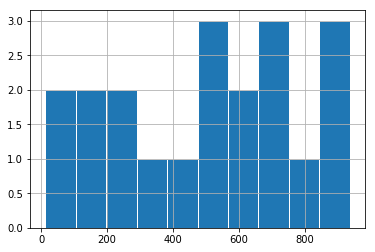

In [54]:
Dataset.hist(bins = 10,  edgecolor="w")

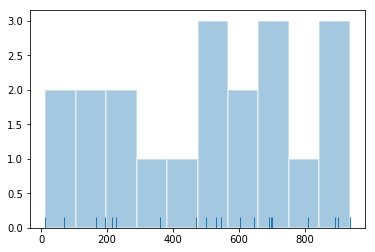

In [55]:
import seaborn as sns
sns.distplot(Dataset, bins=10, kde=False, rug=True, hist_kws=dict(edgecolor="w", linewidth=2))